# ЛАБОРАТОРНА РОБОТА  

## "Алгоритми та моделі перетворення даних"

__Метою__ лабораторної роботи є набуття практичних навичок використання модулів бібліотеки `Scikit-learn` для вирішення наступних задач:

- визначення та розподілення данних по їх типам
- вибір та застосування алгоритмів перетворення різноманітних типів даних
- настроювання параметрів та застосування трансформерів
- побудова конвеєра для автоматизації процесів трансформації даних

__Результатом__ виконання лабораторної роботи повинен стати датасет, в якому колонки з покажчиком перетворені під для навчання моделей

In [1]:
# імпортувати бібліотеки pandas та numpy
import pandas as pd
import numpy as np

## Завдання

Вхідним датасетом є csv-файл, отриманий в результаті виконання лабораторної роботи по конструюванню та очищеню покажчиків даних про продажі квартир рієлторської компанії.

<h4 style='background-color:cyan; color:red; padding:15px'><ul>
    <li>замість `...` вписуйте Ваш програмний код
    <li>не змінюйте імена запропонованих зміних
    </ul>
</h4>

In [4]:
# ззчитати підготовлений датасет `apartments_clean.csv` в датафрейм та проінспектувати його стан
data = pd.read_csv('apartments_clean.csv')
data.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,district,area_comfort
0,30970.0,1,1106.0,12,13,2013,28.0,13.0,5.0,Петропавлівська,Оболонський,10.0
1,30970.0,1,1106.0,12,13,2013,28.0,13.0,5.0,Петропавлівська,Подільський,10.0
2,82000.0,2,1281.0,18,26,2009,64.0,37.0,14.0,Дніпровська,Оболонський,13.0
3,135000.0,2,2077.0,16,23,2012,65.0,25.0,18.0,Дніпровська,Оболонський,22.0
4,84000.0,2,1273.0,6,26,2009,66.0,37.0,18.0,Дніпровська,Оболонський,11.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         483 non-null    float64
 1   rooms         483 non-null    int64  
 2   price_per_m2  483 non-null    float64
 3   level         483 non-null    int64  
 4   levels        483 non-null    int64  
 5   year          483 non-null    int64  
 6   area_total    483 non-null    float64
 7   area_living   483 non-null    float64
 8   area_kitchen  483 non-null    float64
 9   street        483 non-null    object 
 10  district      483 non-null    object 
 11  area_comfort  483 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 45.4+ KB


In [6]:
data.describe()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,area_comfort
count,4.830000e+02,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,2.198224e+05,2.159420,2188.782402,9.474120,17.525880,1999.014493,78.768116,40.465839,15.467909,24.134576
std,7.983972e+05,1.051303,7156.389112,7.081978,8.852693,25.299980,51.387553,26.280966,8.488979,36.063575
min,3.097000e+04,1.000000,478.000000,1.000000,2.000000,1895.000000,25.000000,10.000000,3.000000,0.000000
25%,6.650000e+04,1.000000,1168.000000,4.000000,9.000000,1994.500000,52.000000,30.000000,11.500000,10.000000
50%,1.000000e+05,2.000000,1593.000000,8.000000,18.000000,2009.000000,69.000000,37.000000,14.000000,17.000000
75%,1.600000e+05,3.000000,2077.500000,13.000000,25.000000,2014.000000,87.000000,44.000000,16.000000,26.000000
max,1.570000e+07,7.000000,157000.000000,33.000000,47.000000,2021.000000,400.000000,320.000000,78.000000,299.000000


In [7]:
data.tail()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,district,area_comfort
478,42900.0,2,998.0,1,5,2009,43.0,29.0,14.0,Іскрівська,Солом'янський,0.0
479,115000.0,1,2614.0,2,7,2019,44.0,14.0,21.0,Теремківська,Голосіївський,9.0
480,39000.0,1,1147.0,3,5,1960,34.0,18.0,8.0,Автозаводська,Оболонський,8.0
481,115000.0,3,1135.0,13,25,2004,69.0,37.0,14.0,Здолбунівська,Дарницький,18.0
482,90005.0,2,1915.0,8,15,2009,47.0,17.0,20.0,Шолуденка,Шевченківський,10.0


## 1. Визначення типів покажчиків вхідного датасету

In [8]:
# відокремити від робочого датасету колонку з цільовим показчиком (`Price`) 
# та вилучити її з обробки
target = pd.DataFrame(data['Price'])
data = data.drop(columns = 'Price')

In [9]:
# для самоперевірки: кількисть рядків в датасетах повинна співпадати!
target.shape, data.shape

((483, 1), (483, 11))

In [10]:
# імпортувати з sklearn модуль, що відповідає за селективний відбір покажчиків
from sklearn.compose import make_column_selector as selector

In [11]:
# побудувати  селектори для вібіру числових та категоріальних колонок
numeric_selector = selector(dtype_include = np.number)
category_selector = selector(dtype_include = 'object')

In [12]:
# застосувати побудовані селектори для створення списків числових та категоріальних показчиків
numeric_data_columns = numeric_selector(data)
category_data_columns = category_selector(data)

print(f'список числових покажчиків = {numeric_data_columns}')
print(f'список категоріальних покажчиків = {category_data_columns}')

список числових покажчиків = ['rooms', 'price_per_m2', 'level', 'levels', 'year', 'area_total', 'area_living', 'area_kitchen', 'area_comfort']
список категоріальних покажчиків = ['street', 'district']


In [13]:
# створити 2 окремі датасети: числовий та категоріальний та вивести їх основні властивості
data_numeric = data[numeric_data_columns]
data_category = data[category_data_columns]

data_numeric.shape, data_category.shape

((483, 9), (483, 2))

## 2. Маштабування числових та категоріальних колонок

### 2.1. Маштабування числових показчиків

In [14]:
# з модуля `preprocessing` імпортувати нормалізатор 'MinMaxScaler' та стандартизатор 'StandardScaler'
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
# створити відповідні маштабувачі
standart_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [18]:
# побудувати змаштабовані датасети за двома стратегіями: стандартизація та нормалізація
data_numeric_std = standart_scaler.fit_transform(data_numeric)
data_numeric_min_max = min_max_scaler.fit_transform(data_numeric)

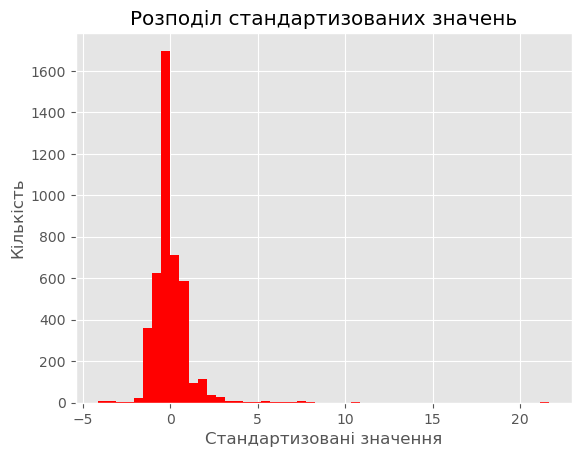

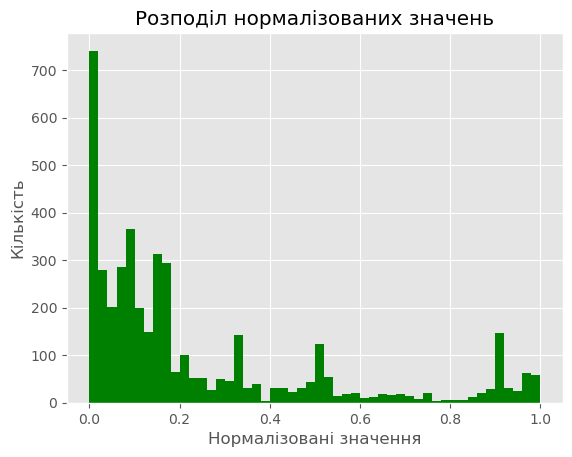

In [20]:
# побудувати графіки розподілення значень показчиків при
# стандартном та нормалізованом маштабуванні
import matplotlib.pyplot as plt
with plt.style.context('ggplot'):
    plt.hist(data_numeric_std.flatten(), bins = 50, color = 'red')
    plt.title('Розподіл стандартизованих значень')
    plt.xlabel('Стандартизовані значення')
    plt.ylabel('Кількість')
    plt.show()
with plt.style.context('ggplot'):
    plt.hist(data_numeric_min_max.flatten(), bins = 50, color = 'green')
    plt.title('Розподіл нормалізованих значень')
    plt.xlabel('Нормалізовані значення')
    plt.ylabel('Кількість')
    plt.show()

#####  __проаналізувати графіки та визначись який маштабувач краще підходить до числовї підмножини робочого датасету__

### 2.1. Маштабування категоріальних показчиків

In [21]:
# з модуля `preporcessing` імпортувати кодувальники 'OrdinalEncoder' та 'OneHotEncoder'
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [22]:
# проаналізувати категоріальні показчики та визначитись до якого показчика
# який енкодер доцільно застосовувати
data_category.describe()

,street,district
count,483,483
unique,164,24
top,Перемоги,Дарницький
freq,45,62


In [23]:
# створити енкодери та закодувати ними відповідні категоріальні колонки
ordinal_encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [24]:
encoded_category = ordinal_encoder.fit_transform(data_category.iloc[:, 2:])
encoded_street_district = one_hot_encoder.fit_transform(data_category.iloc[:, :2])

In [25]:
encoded_category.shape, encoded_street_district.shape

((483, 0), (483, 188))

In [26]:
encoded_street_district

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

## 3. Побудова трансформера для підготовки даних

In [27]:
# з модуля `compose` імпортувати трансформер колонок `ColumnTransformer`
from sklearn.compose import ColumnTransformer
, remainder="drop"

In [30]:
# побудувати трансформер для предобробки числових та категоріальних показчиків
# робочого датасету
transformer = ColumnTransformer([
 ('numeric_scaler', standart_scaler, numeric_data_columns),
 ('one_hot_encoder', one_hot_encoder, category_data_columns)])
transformer

ColumnTransformer(transformers=[('numeric_scaler', StandardScaler(),
                                 ['rooms', 'price_per_m2', 'level', 'levels',
                                  'year', 'area_total', 'area_living',
                                  'area_kitchen', 'area_comfort']),
                                ('one_hot_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['street', 'district'])])

In [39]:
# отримати вихідний масив застосував трансфомер до вхідного датасуту
data_transformed = transformer.fit_transform(data)
data_transformed.shape

(483, 197)

In [50]:
transformed_feature_names = []
for tr in transformer.transformers_:
    # назви стовпців числових даних
    if tr[0] == 'numeric_scaler':
        transformed_feature_names += numeric_data_columns
    # назви стовпців категоріальних даних після one-hot encoding
    elif tr[0] == 'one_hot_encoder':
        transformed_feature_names += list(tr[1].get_feature_names_out(input_features=tr[2]))

In [52]:
data_transformed = transformer.fit_transform(data)

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
pipe = Pipeline(steps=[('column transformer', transformer)])
pipe

Pipeline(steps=[('column transformer',
                 ColumnTransformer(transformers=[('numeric_scaler',
                                                  StandardScaler(),
                                                  ['rooms', 'price_per_m2',
                                                   'level', 'levels', 'year',
                                                   'area_total', 'area_living',
                                                   'area_kitchen',
                                                   'area_comfort']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['street', 'district'])]))])

In [42]:
data_transformed_array = pipe.fit_transform(data)
data_transformed_array.shape

(483, 197)

In [53]:
# побудувати вихідний датафрейм з вихідного масиву додавши в першу колонку
# ціловий показчик `target`
apartment_transformed = pd.concat([target, pd.DataFrame(data_transformed, columns=transformed_feature_names)], axis = 1)
apartment_transformed

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,area_comfort,...,"district_Печерський, Шевченківський",district_Подільський,"district_Подільський, Оболонський",district_Святошинський,"district_Святошинський (СТ ""Нивки"")",district_Солом'янський,"district_Солом'янський, Шевченківський",district_Шевченківський,"district_Шевченківський, Святошинський, Солом'янський","district_Шевченківський, Солом'янський"
0,30970.0,-1.103985,-0.151460,0.357033,-0.511773,0.553360,-0.988970,-1.046168,-1.234396,-0.392341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30970.0,-1.103985,-0.151460,0.357033,-0.511773,0.553360,-0.988970,-1.046168,-1.234396,-0.392341,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,82000.0,-0.151798,-0.126981,1.205132,0.958229,0.395094,-0.287685,-0.132013,-0.173099,-0.309069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,-0.151798,-0.015636,0.922432,0.618998,0.513794,-0.268205,-0.589091,0.298589,-0.059251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84000.0,-0.151798,-0.128100,-0.491066,0.958229,0.395094,-0.248725,-0.132013,0.298589,-0.364584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,42900.0,-0.151798,-0.166567,-1.197816,-1.416390,0.395094,-0.696768,-0.436732,-0.173099,-0.669917,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
479,115000.0,-1.103985,0.059480,-1.056466,-1.190236,0.790761,-0.677288,-1.008079,0.652355,-0.420099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
480,39000.0,-1.103985,-0.145725,-0.915116,-1.416390,-1.543675,-0.872089,-0.855719,-0.880630,-0.447856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
481,115000.0,0.800389,-0.147403,0.498383,0.845152,0.197260,-0.190284,-0.132013,-0.173099,-0.170281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Проінспектувати вихідний датасет `apartment_transformed`
apartment_transformed.describe()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,area_comfort,...,"district_Печерський, Шевченківський",district_Подільський,"district_Подільський, Оболонський",district_Святошинський,"district_Святошинський (СТ ""Нивки"")",district_Солом'янський,"district_Солом'янський, Шевченківський",district_Шевченківський,"district_Шевченківський, Святошинський, Солом'янський","district_Шевченківський, Солом'янський"
count,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,...,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,2.198224e+05,1.323993e-16,-3.677757e-17,-1.176882e-16,-1.176882e-16,-2.206654e-15,7.355515e-18,5.148860e-17,-1.066550e-16,6.252188e-17,...,0.004141,0.066253,0.010352,0.082816,0.002070,0.072464,0.004141,0.126294,0.031056,0.004141
std,7.983972e+05,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,...,0.064282,0.248981,0.101322,0.275889,0.045502,0.259523,0.064282,0.332525,0.173649,0.064282
min,3.097000e+04,-1.103985e+00,-2.393045e-01,-1.197816e+00,-1.755621e+00,-4.115511e+00,-1.047411e+00,-1.160438e+00,-1.470240e+00,-6.699169e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.650000e+04,-1.103985e+00,-1.427872e-01,-7.737663e-01,-9.640817e-01,-1.786236e-01,-5.214467e-01,-3.986417e-01,-4.679035e-01,-3.923413e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000e+05,-1.517979e-01,-8.333813e-02,-2.083667e-01,5.361212e-02,3.950936e-01,-1.902843e-01,-1.320131e-01,-1.730987e-01,-1.980384e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.600000e+05,8.003889e-01,-1.556620e-02,4.983827e-01,8.451518e-01,5.929271e-01,1.603583e-01,1.346155e-01,6.274521e-02,5.177963e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.570000e+07,4.609136e+00,2.165502e+01,3.325381e+00,3.332848e+00,8.698940e-01,6.257643e+00,1.064740e+01,7.373905e+00,7.629593e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
apartment_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Columns: 198 entries, Price to district_Шевченківський, Солом'янський
dtypes: float64(198)
memory usage: 747.3 KB


In [57]:
# зберегти підготовлений датасет в csv-файлі `apartment_transformed.csv`
apartment_transformed.to_csv('apartment_transformed.csv')